<a href="https://colab.research.google.com/github/amirhosseinzinati/YOLO-Custom-Dataset-Harry-Potter-/blob/main/Harry_Potter_YOLO_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv8 Custom Detection -Harry Potter

This notebook explains training custom YOLOv8 model for object detection. I am using "Harry Potter Dataset".Dataset include 372 picture for train and 12piture for Validateion .Dataset have 5 Calss :
1. Harry Potter
2. Hermione Granger
3. Ron Weasley
4. Lord Voldemort
5. Neville Longbottom

#Setting Up Google Colab

Google Colab is an online environment similar to Jupiter notebook where you can train deep learning models on GPU/TPU. The free plan of Google Colab allows you to train the deep learning model for up to 12 hrs before the runtime disconnects. By visiting the runtime section change run type to GPU.

In [ ]:
#to check and monitoring of NVIDIA GPU devices. 
!nvidia-smi

Sun Mar 12 17:41:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    33W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#YOLOV8 Installation:

YOLOv8 Come with 2 Instalation .you can clone YOLOv8 Repository or install it with pip .
The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Mounting Google Drive

I have uploaded Harry Potter Dataset  to Google drive in the 'MyDrive/Colab Notebooks/YOLOv8/data' path, I will mount drive using the below code. (It will ask you to enter the authorization code that you can by clicking the link that will appear below). The annotated data has been divided in such a way that the images and the labels (text files) are separate.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check the uploaded data in drive
!ls '/content/drive/MyDrive/Colab Notebooks/YOLOv8/data'
!ls '/content/drive/MyDrive/Colab Notebooks/YOLOv8/data/train'

test  train  val
images	labels	labels.cache


In [ ]:
 import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.0/78.2 GB disk)


#YOLOV8 format

The YOLO format, with one .txt file per image (if no objects in image, no .txt file is required). The *.txt file specifications are:

One row per object Each row is class x_center y_center width height format.

Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height. Class numbers are zero-indexed (start from 0).

In [ ]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/YOLOv8/data/train/images/Harry Potter and the Deathly Hallows_ Part 2 2011.mp4_20230308_145756.577.jpg')
width = np.size(image, 1)
height = np.size(image, 0)
print ("shape of the training image {}, {}".format(width,height))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/YOLOv8/data/val/images/Harry Potter and the Deathly Hallows_ Part 2 2011.mp4_20230310_154127.315.jpg')
width = np.size(image, 1)
height = np.size(image, 0)
print ("shape of the validation image {}, {}".format(width,height))

shape of the training image 1920, 800
shape of the validation image 1920, 800


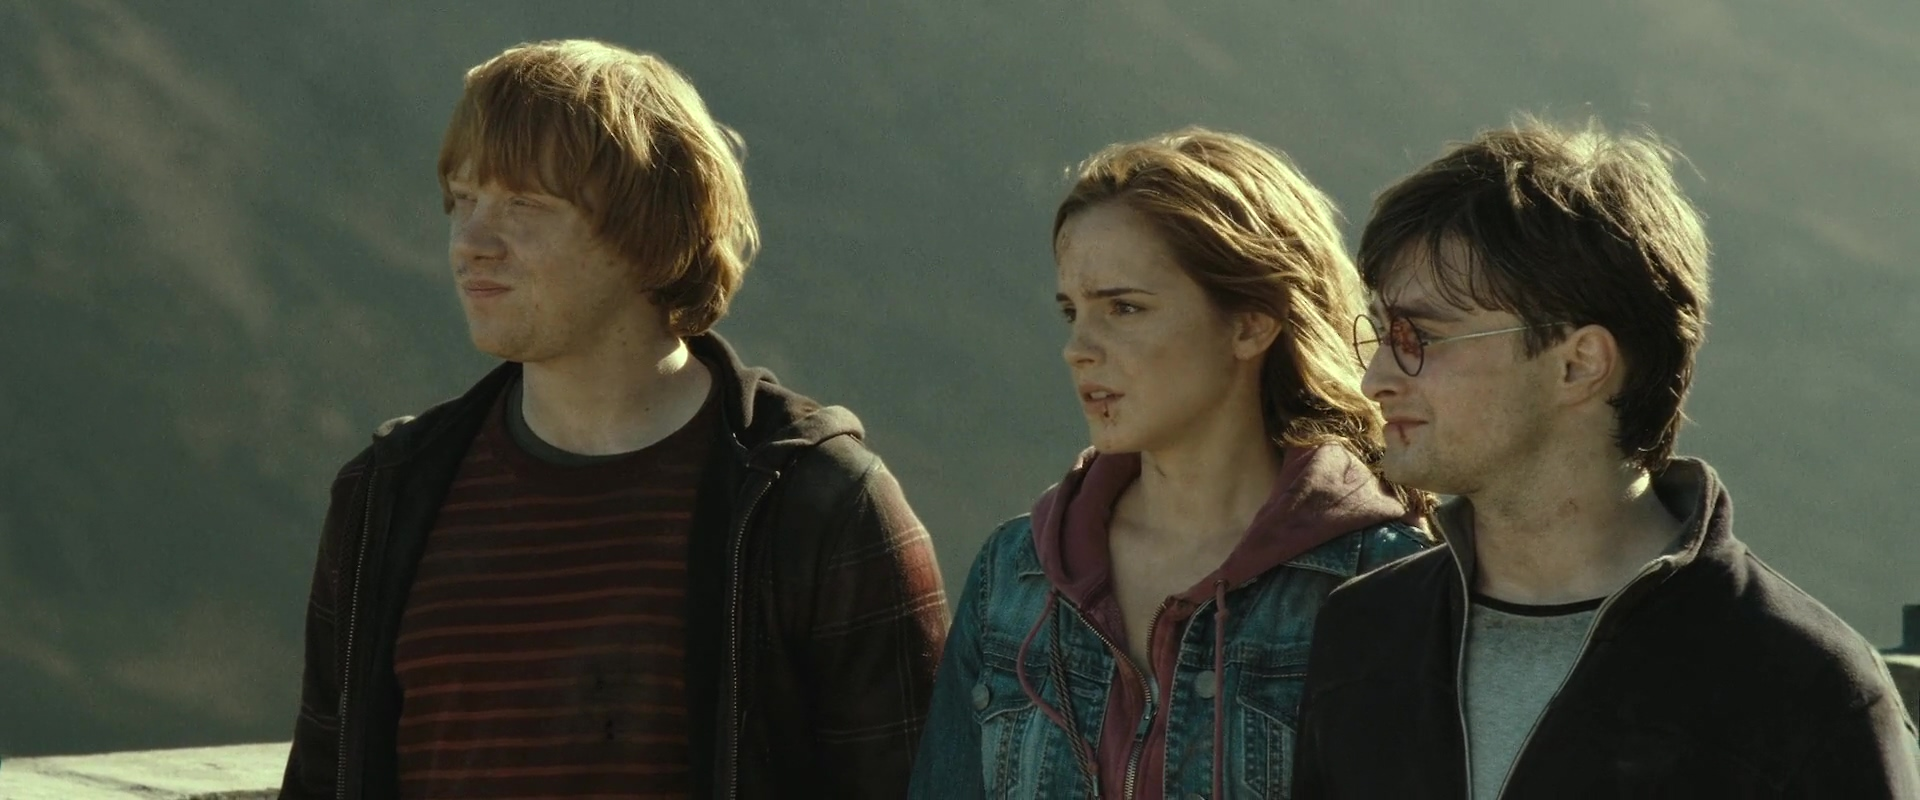

In [ ]:
# dispying with different width
from IPython.display import Image 

Image(filename='/content/drive/MyDrive/Colab Notebooks/YOLOv8/data/train/images/Harry Potter and the Deathly Hallows_ Part 2 2011.mp4_20230308_145756.577.jpg', width=1200) 

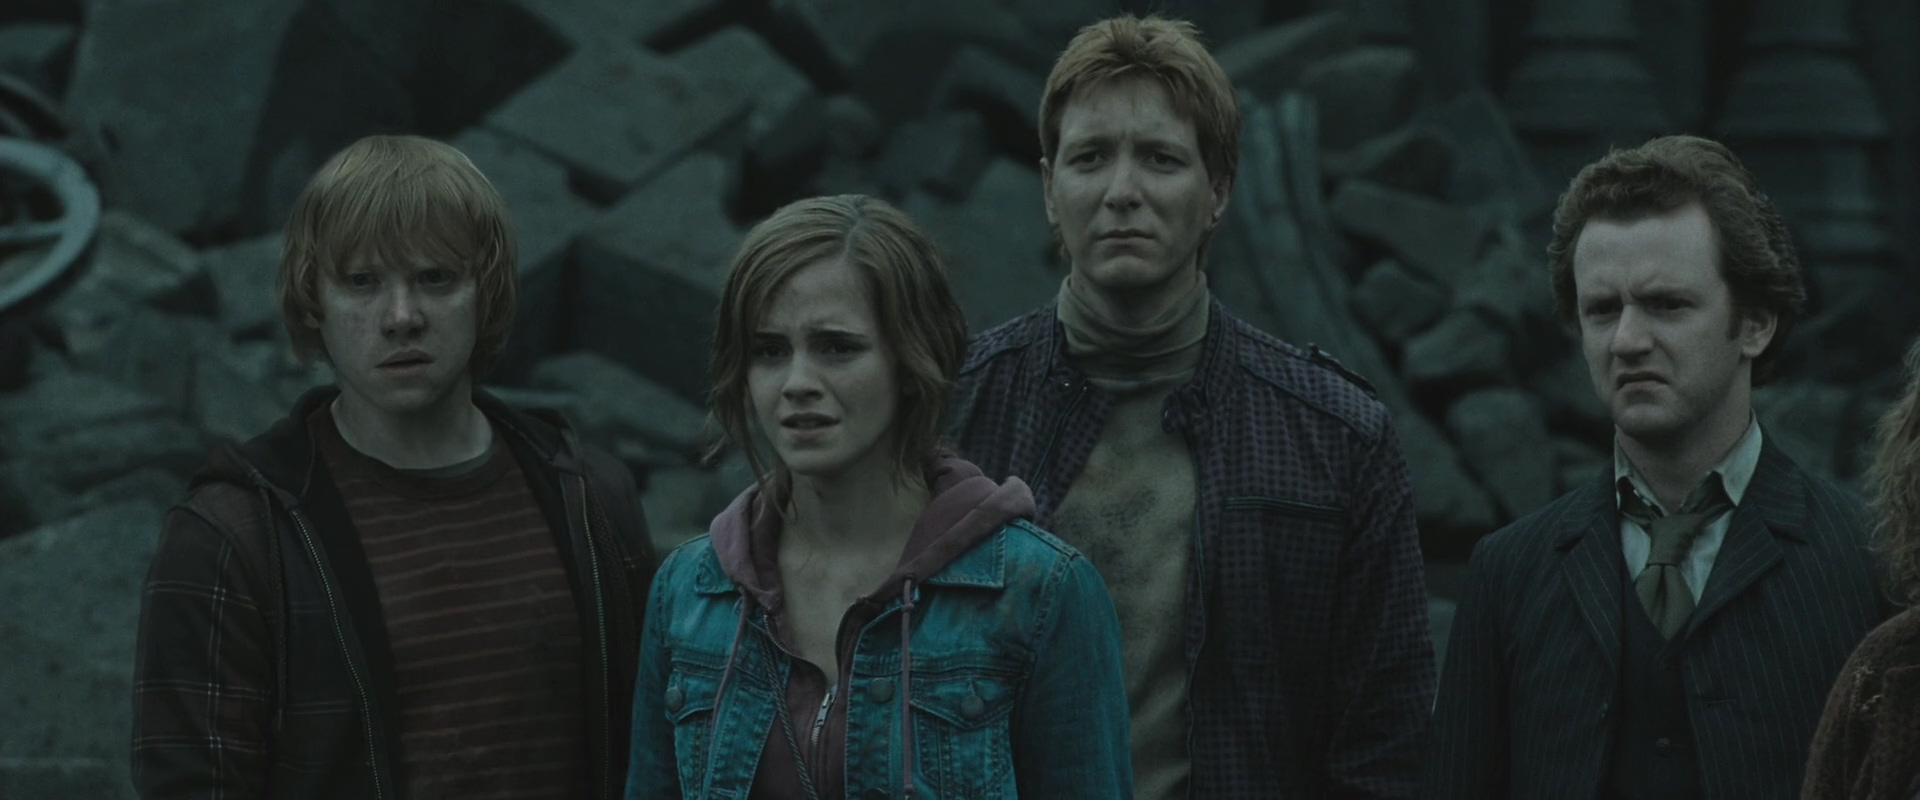

In [ ]:
# dispying with different width
Image(filename='/content/drive/MyDrive/Colab Notebooks/YOLOv8/data/val/images/Harry Potter and the Deathly Hallows_ Part 2 2011.mp4_20230310_154127.315.jpg', width=1200) 

#Training Our Custom Harry Potter Detetcion Model

I am using a YOLOv8m pretrained model for custom training with my dataset.

Parameters:
  * specify the path to the data configuration file
  * specify a path to weights to start transfer learning from. yolov8m.pt (starting from Pretrained weights)
  * input image size
  * Size of a batch (model weights are updated with each batch).
  * No of epochs.

It will cache images for faster training, cache images in "ram" (default) or "disk


In [ ]:
#Change Directory For Save Model in YOLOv8 folder
%cd /content/drive/MyDrive/Colab Notebooks/YOLOv8

/content/drive/MyDrive/Colab Notebooks/YOLOv8


In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/Colab Notebooks/YOLOv8/data.yaml",
                      epochs=40,
                      imgsz=800,
                      plots=True)  # train the model

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/YOLOv8/data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

#Val

Validate trained YOLOv8n model accuracy on the validatio dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [ ]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/val/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
                   all         12         13        0.9       0.97      0.969      0.809
           Ron Weasley         12          1      0.969          1      0.995      0.796
      Hermione Granger         12          1      0.732          1      0.995      0.895
    Neville Longbottom         12         11      0.999      0.909      0.918      0.736
Speed: 0.2ms preprocess, 24.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


#Metrics

The trainig mAP per class and over all is good and testing results on video are also good. If we train for epochs, adding more data and playing with hyperparameters can improve performance of the model.

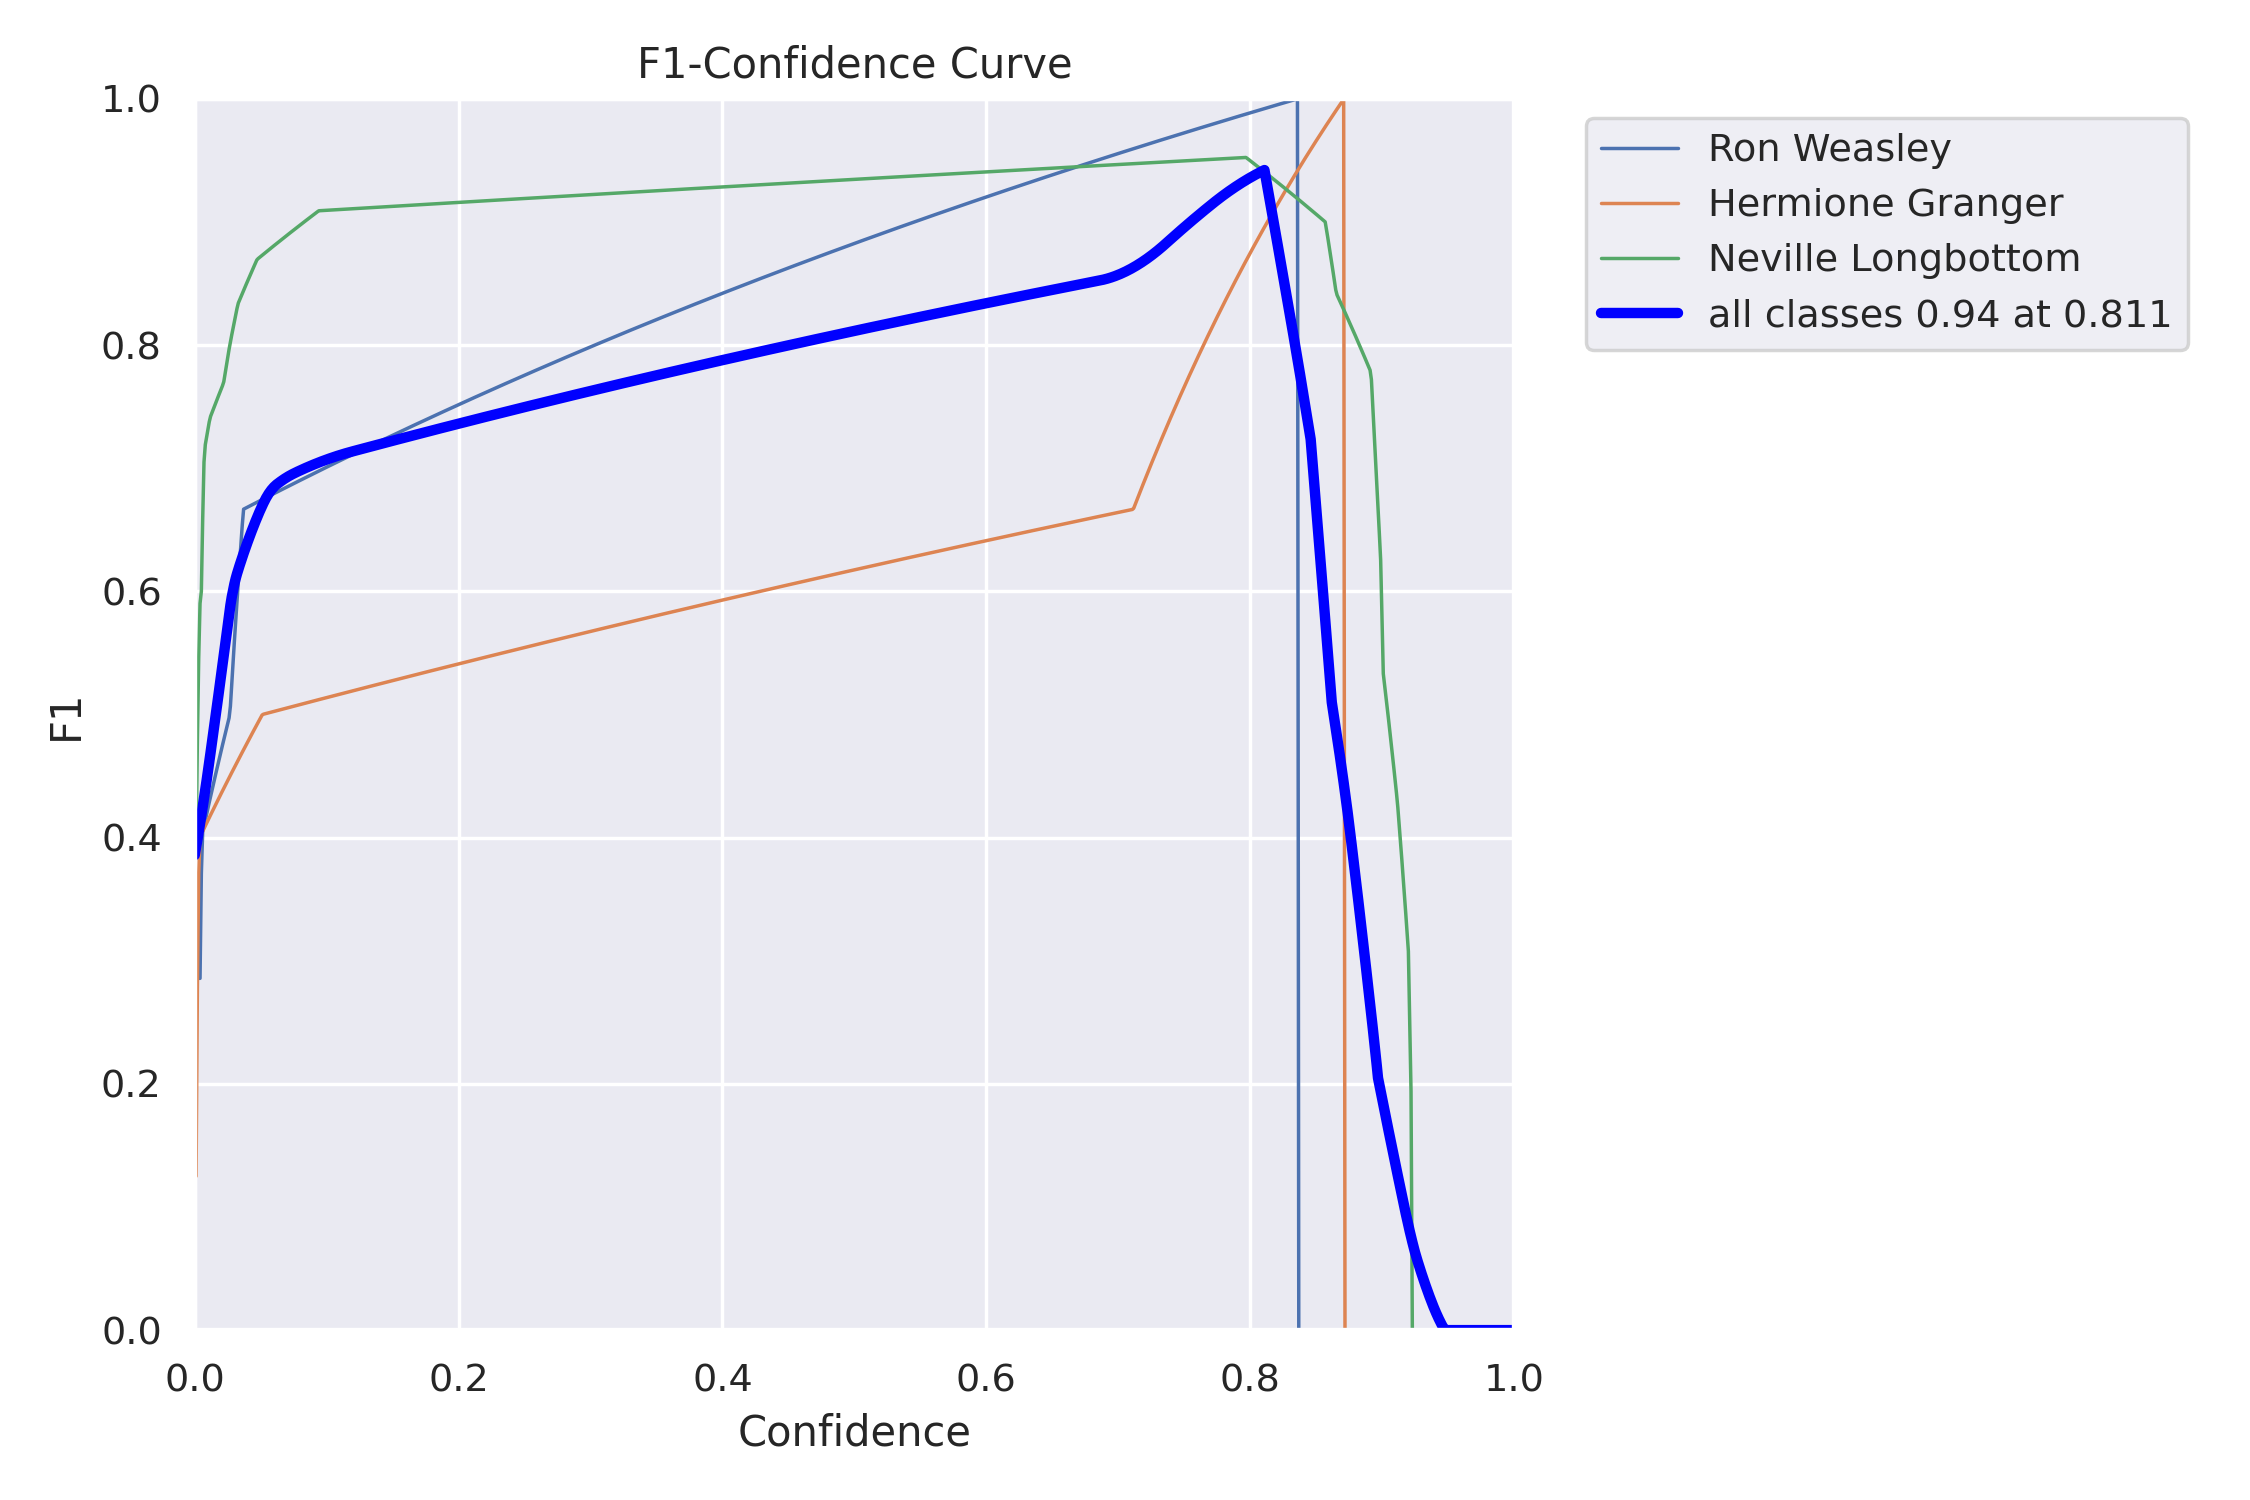

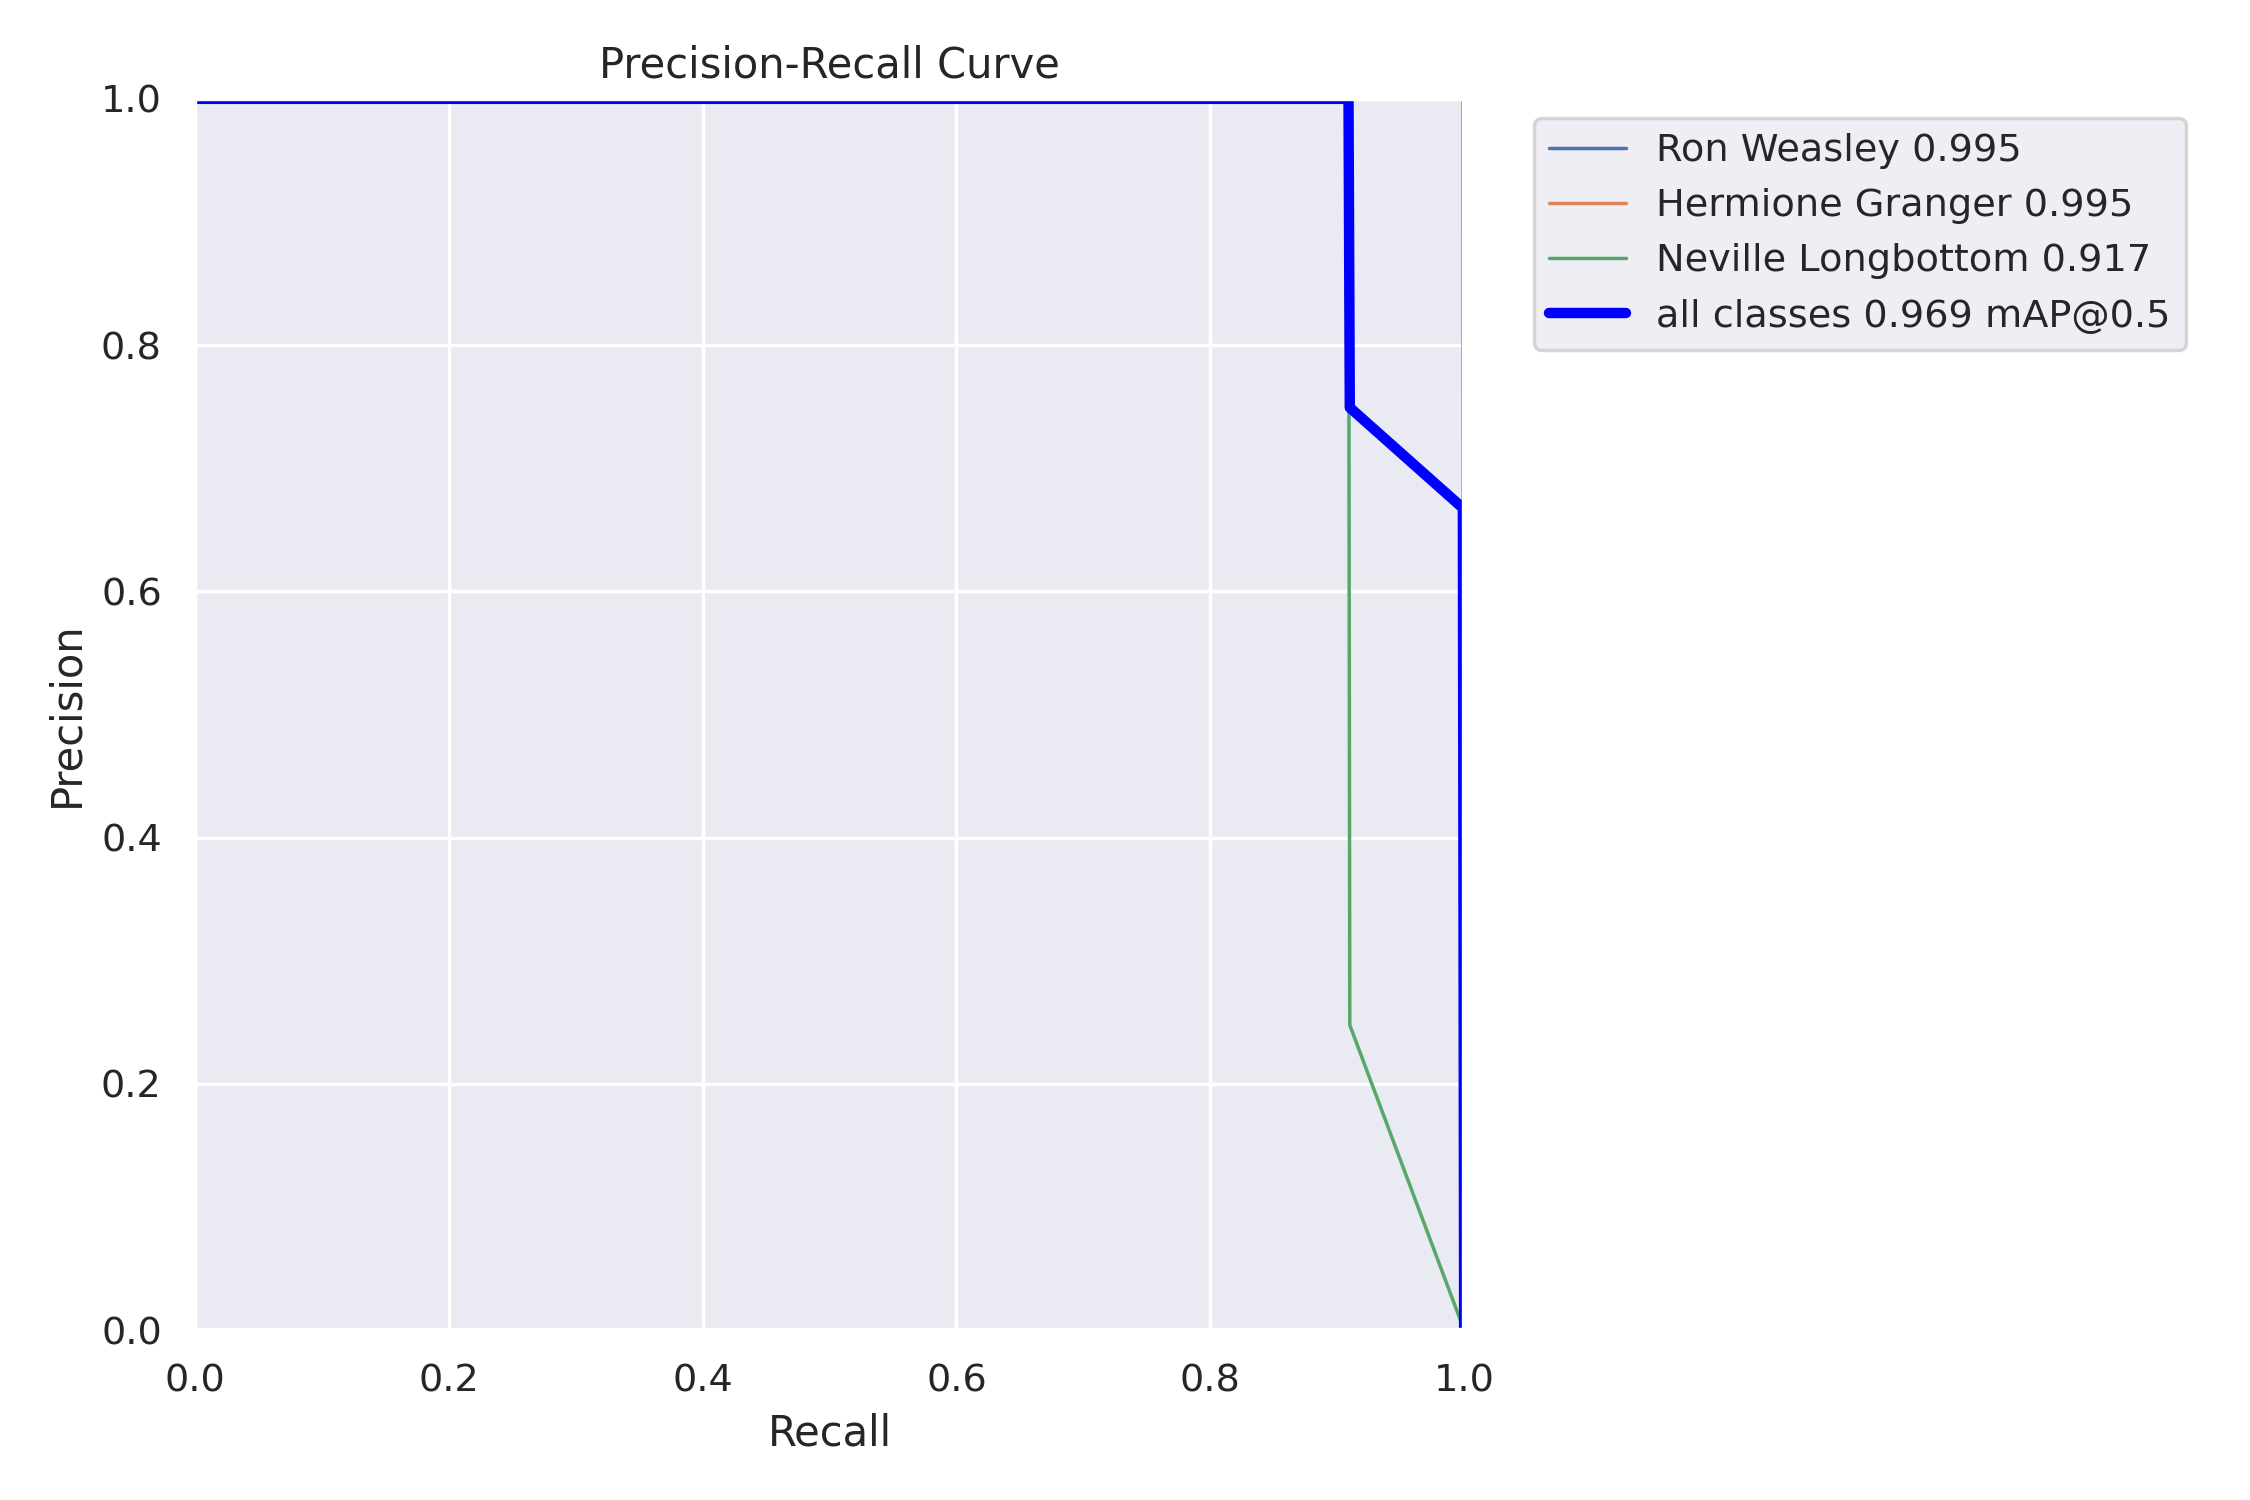

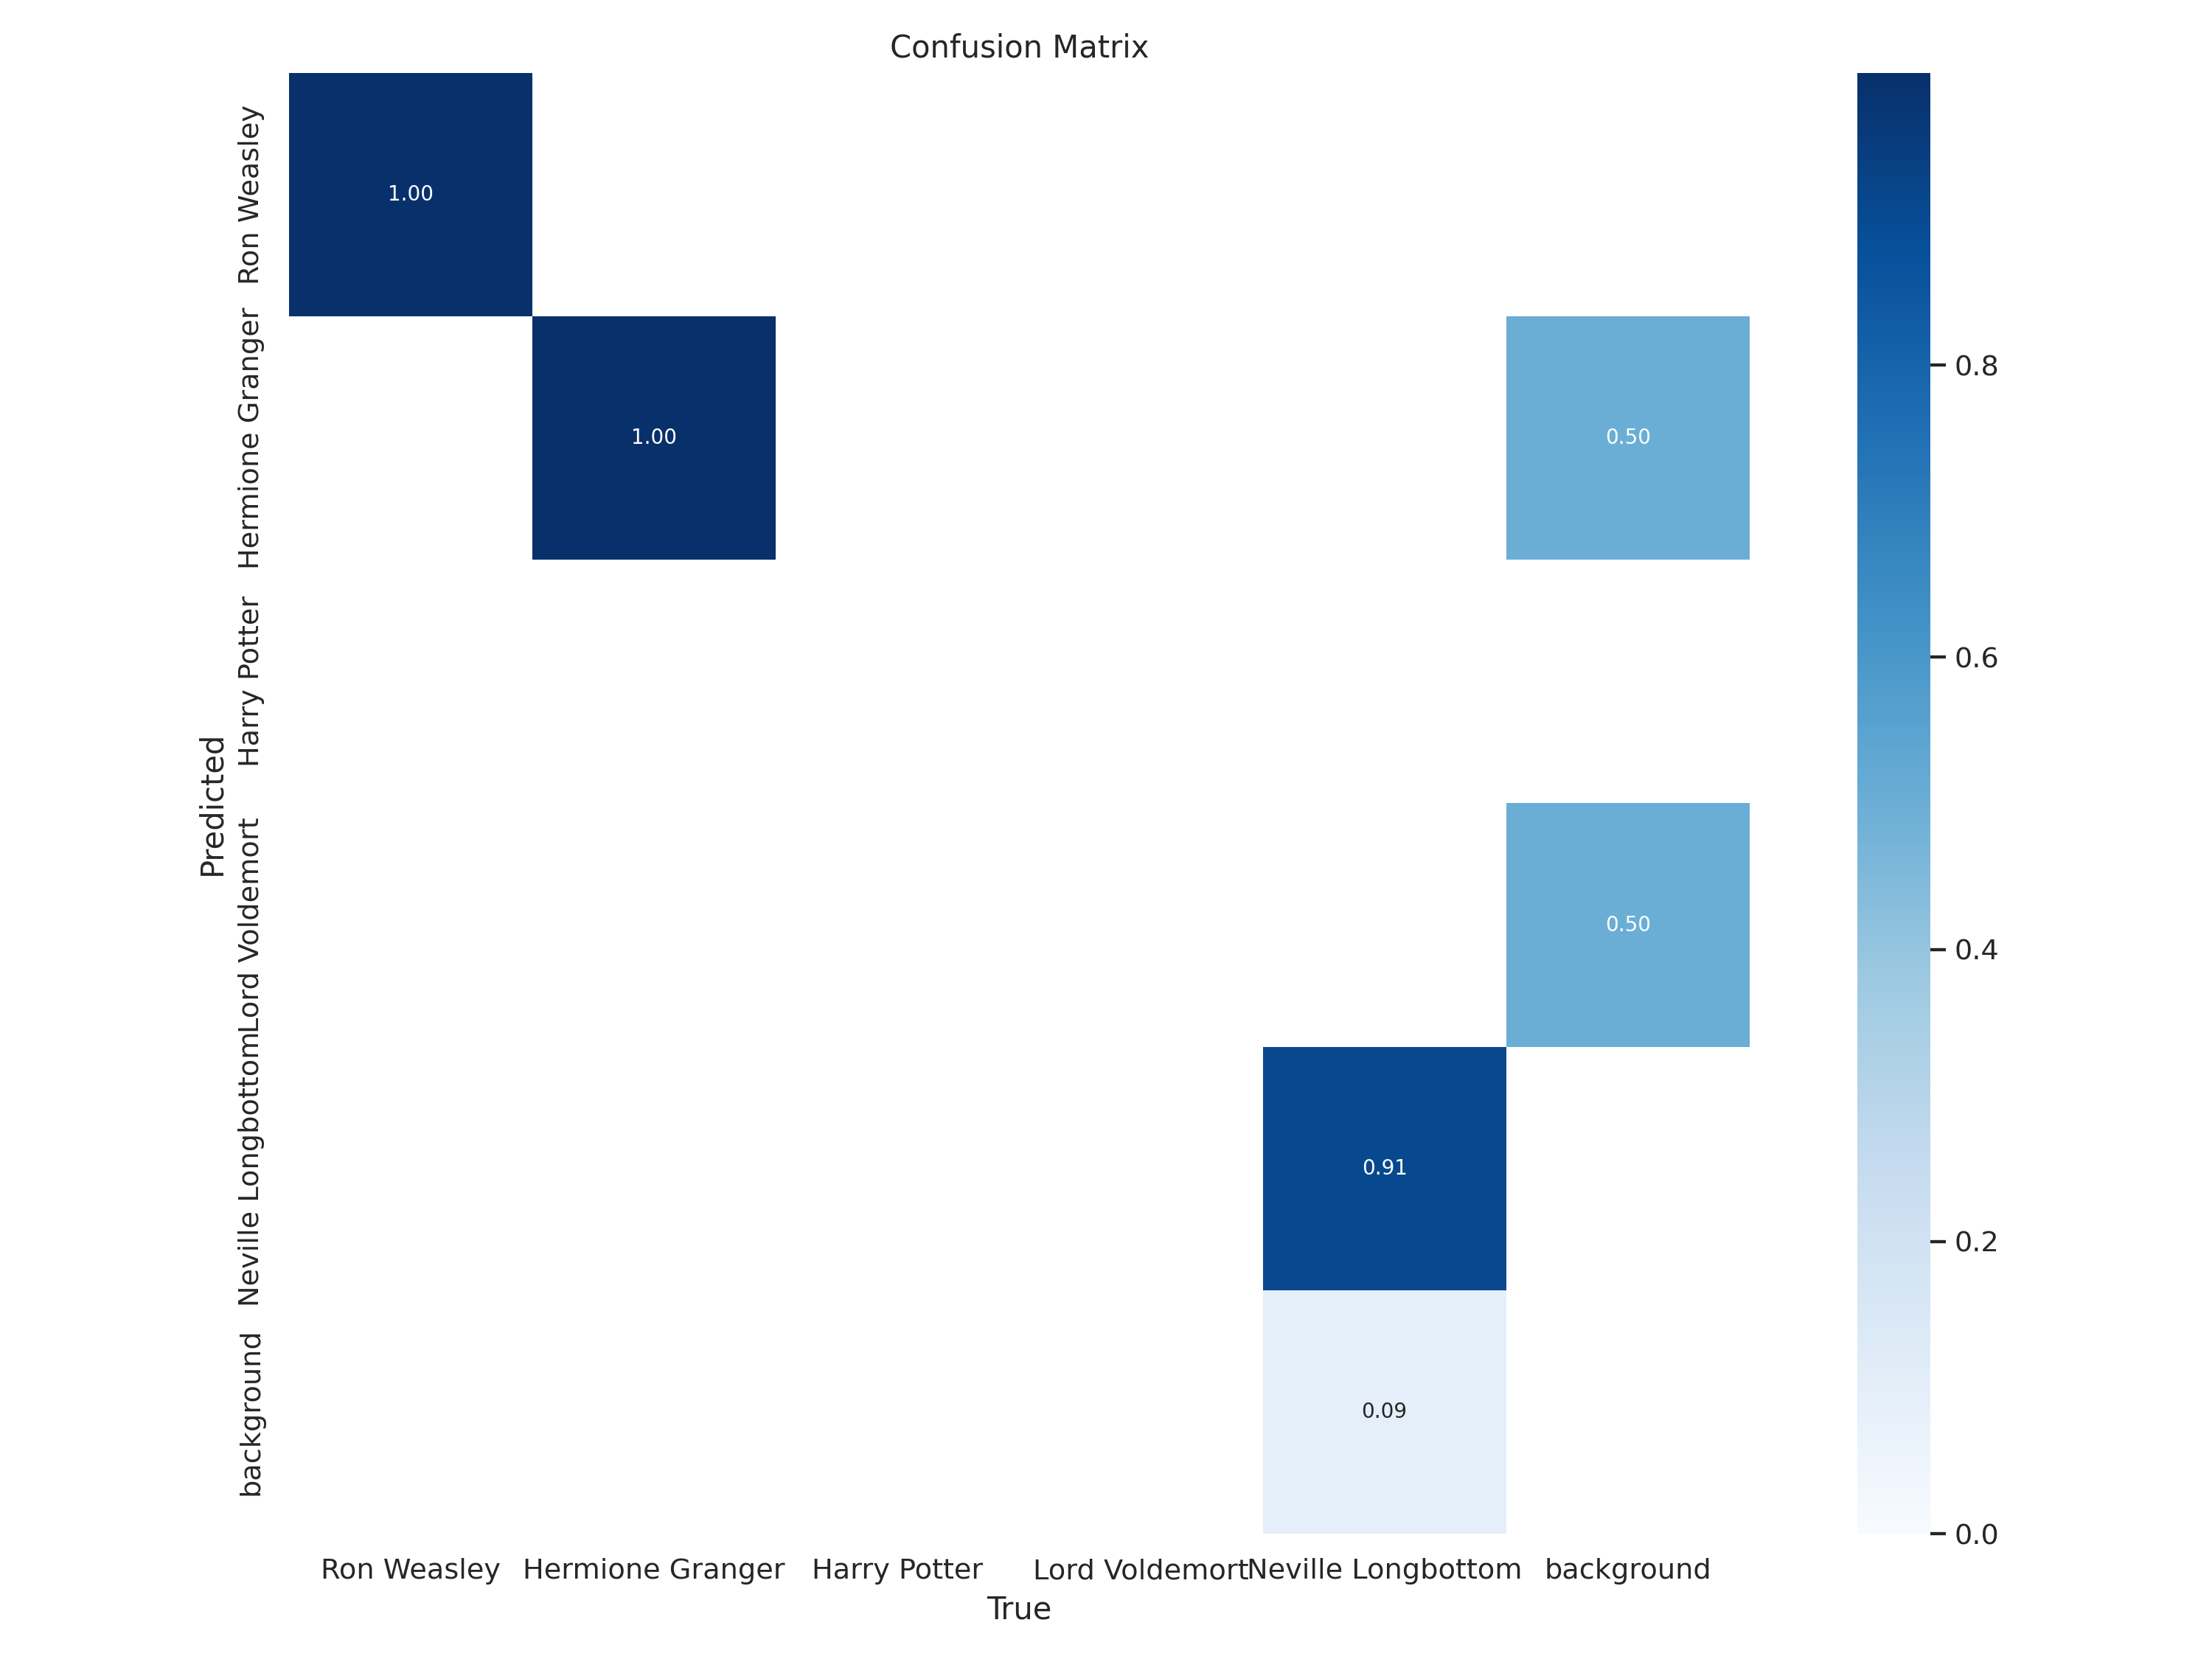

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png',width=800) 
y = Image(filename='runs/detect/train/PR_curve.png',width=800) 
z = Image(filename='runs/detect/train/confusion_matrix.png',width=800) 
display(x, y,z)


#Inference

In [ ]:
# checking the latest trained files
!ls 'runs/detect/train/weights'

best.pt  last.pt


In [ ]:
# loading the trianed model
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model

In [ ]:
# testing the model on a video
# if you want to test model on video put folder address bellow
results = model("/content/drive/MyDrive/Colab Notebooks/YOLOv8/data/predict/",save=True) 


video 1/1 (1/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4: 288x640 (no detections), 35.8ms
video 1/1 (2/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4: 288x640 (no detections), 25.1ms
video 1/1 (3/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4: 288x640 (no detections), 23.4ms
video 1/1 (4/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4: 288x640 (no detections), 22.0ms
video 1/1 (5/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4: 288x640 (no detections), 22.0ms
video 1/1 (6/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4: 288x640 (no detections), 22.0ms
video 1/1 (7/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4: 288x640 (no detections), 24.9ms
video 1/1 (8/8316) /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/Harry Potter-low.mp4:

References:

1.[ultralytics](https://github.com/ultralytics/ultralytics)

2.[ultralytics Doc](https://docs.ultralytics.com/tasks/detection/)
